# **Assignment 1 - Kaggle ML & DS Survey Challenge**

**Course**: MIE1624 - Introduction to Data Science and Analytics

**Professor**: Dr. Oleksandr Romanko, PhD.

**Due Date**:  11:59pm, 16 Feb 2021

**Student**:  Sugumar Prabhakaran (**id#**: 994126815)

## **Question 1 - Exploratory Data Analysis**

**[3pts]** Perform exploratory data analysis to analyze the survey dataset and to summarize its main
characteristics. Present 3 graphical figures that represent different trends in the data. For your
explanatory data analysis, you can consider Country, Age, Education, Professional Experience,
and Salary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 12)

df = pd.read_csv('clean_kaggle_data.csv', low_memory=False)
print("df shape: ", df.shape, '\n')

df.iloc[:,2:11].head()

df shape:  (10729, 356) 



,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3
0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL
1,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN
2,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL
3,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL
4,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN


In [2]:
# rename country values in columns 3 that are long into shorter forms
df['Q3'] = df['Q3'].map({'United States of America':'USA', 
              'United Kingdom of Great Britain and Northern Ireland': 'UK', 
              'United Arab Emirates': 'UAE',
              'Iran, Islamic Republic of...': 'Iran',
              'Republic of Korea': 'South Korea'}).fillna(df['Q3'])
# group all non-binary in column 2 into a single group for ease of plotting
df['Q2'] = df['Q2'].map({'Man':'Male', 'Woman':'Female'}).fillna('Other')
# rename education column 4 values into shorter strings 
df['Q4'] = df['Q4'].map({"Some college/university study without earning a bachelor’s degree": \
                         'College',
                         'No formal education past high school':'High School', 
                         'I prefer not to answer':'No answer'}).fillna(df['Q4'])

In [3]:
df['Q4'].value_counts()

Master’s degree        4879
Bachelor’s degree      3013
Doctoral degree        1718
Professional degree     470
College                 385
No answer               158
High School             106
Name: Q4, dtype: int64

In [4]:
# create a new dataframe with only essential columns for EDA
eda_df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q24']]
eda_df.columns=['age_grp', 'gender','country','degree','title','yrs_exp',
                'annual_salary']
eda_df.head()

,age_grp,gender,country,degree,title,yrs_exp,annual_salary
0,30-34,Male,USA,Master’s degree,Data Engineer,5-10 years,125000
1,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,10-20 years,20000
2,30-34,Male,USA,Master’s degree,Data Scientist,5-10 years,150000
3,35-39,Male,Germany,Doctoral degree,Data Scientist,5-10 years,80000
4,35-39,Male,USA,Doctoral degree,Research Scientist,1-2 years,40000


In [5]:
# generate a pivot table to look at count of genders by countries
country_gender = eda_df.pivot_table(index='country', columns='gender', 
                                    values='degree', aggfunc='count', 
                                    fill_value=0).astype(int)
country_gender['Total'] = country_gender.apply(np.sum, axis=1)
country_gender.sort_values('Total', ascending=False, inplace=True)
country_gender.head()

gender,Female,Male,Other,Total
country,,,,
India,433,1892,28,2353
USA,280,1160,44,1484
Other,109,688,18,815
Brazil,49,394,0,443
Japan,20,361,4,385


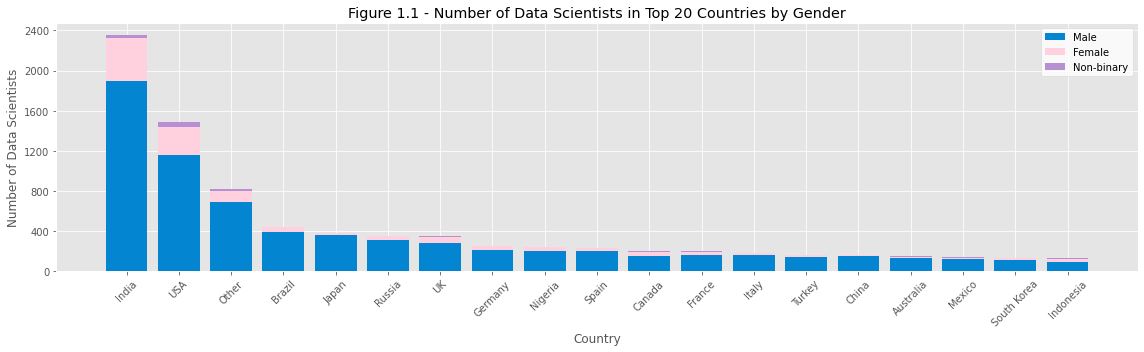

In [37]:
plt.style.use('ggplot')     # import seaborn 'ggplot' style sheet

# Figure 1.1 - plot breakdown of gender in top 20 countries in descending order
fig, ax = plt.subplots(figsize=(16,5))
ax.bar(country_gender.index[:19], country_gender['Male'][:19], color='#0485d1',
       label='Male')
ax.bar(country_gender.index[:19], country_gender['Female'][:19], 
       bottom = country_gender['Male'][:19], color='#ffd1df', label='Female')
ax.bar(country_gender.index[:19], country_gender['Other'][:19], 
       bottom = country_gender['Male'][:19]+ country_gender['Female'][:19], 
       color='#b790d4',label='Non-binary')
# formatting
ax.set_xlabel('Country')
ax.set_xticklabels(country_gender.index, rotation=45)
ax.set_ylabel('Number of Data Scientists')
ax.set_yticks(np.arange(0,2401,400))
ax.legend(facecolor='white')
plt.title('Figure 1.1 - Number of Data Scientists in Top 20 Countries by Gender')
plt.tight_layout()
#fig.savefig('country_gender.png', dpi=550)
plt.show()

In [7]:
# split male and female data points into separate dataframes
# Non-binary data points are excluded since they are not large samples
male_df = eda_df[eda_df['gender']=='Male']
female_df = eda_df[eda_df['gender']=='Female']

#display number of data points for each new male/female dataframes
print("male_df shape: ", male_df.shape)
print("female_df shape: ", female_df.shape)

male_df shape:  (8872, 7)
female_df shape:  (1683, 7)


In [8]:
# generate pivot table of average salary between genders by age group
age_salary = eda_df.pivot_table(index='age_grp', columns='gender', 
                                values='annual_salary', aggfunc=np.mean, fill_value=0)
age_salary = age_salary.apply(lambda x: round(x,2))
age_salary

gender,Female,Male,Other
age_grp,,,
18-21,14922.33,13947.64,42153.85
22-24,10219.18,18417.94,20717.39
25-29,28093.75,30605.17,23054.05
30-34,43132.11,51617.42,70359.38
35-39,49126.07,60853.31,125978.26
40-44,57914.97,74068.67,105571.43
45-49,62993.90,75640.21,103666.67
50-54,52114.75,89711.54,88000.00
55-59,88560.00,88777.15,100666.67


In [9]:
# generate separate education pivot tables for each gender and age group
education_age_male = male_df.pivot_table(index='age_grp', columns='degree', 
                                         values='annual_salary', aggfunc='count')
education_age_male = round(education_age_male, 2)

# generate female table.  Fill with value of 0 for NaN values
education_age_female = female_df.pivot_table(index='age_grp', columns='degree', 
                                             values='annual_salary', 
                                             aggfunc='count', fill_value=0)
education_age_female = round(education_age_female, 2)
education_age_female

degree,Bachelor’s degree,College,Doctoral degree,High School,Master’s degree,No answer,Professional degree
age_grp,,,,,,,
18-21,66,14,3,1,17,2,0
22-24,126,7,6,1,140,2,10
25-29,113,3,50,0,224,5,21
30-34,51,5,74,0,155,6,8
35-39,35,3,70,2,112,0,12
40-44,30,2,47,0,58,2,8
45-49,16,1,15,0,35,5,10
50-54,9,2,23,0,22,0,5
55-59,2,0,11,0,9,1,2


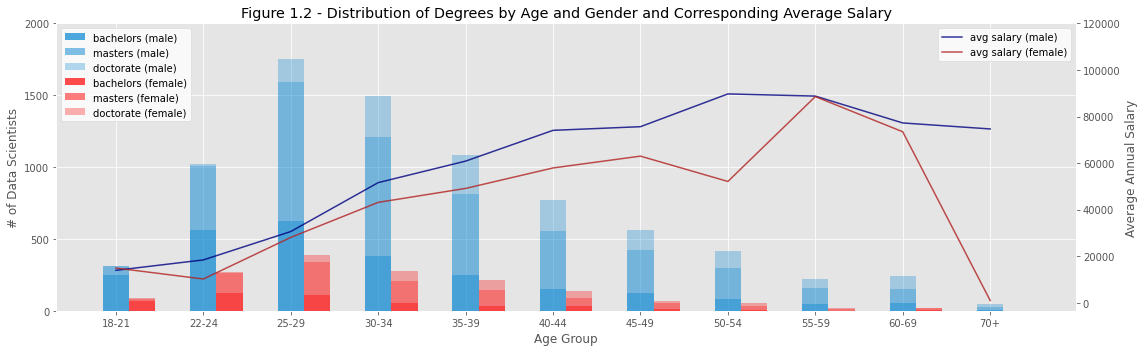

In [45]:
# Figure 1.2 - generate twin-axis plot with bars (left axis) for count of data 
# scientists by age, gender and education level and line plot (right axis) 
# for average salaries by age group and gender
fig, ax = plt.subplots(figsize=(16,5))

# create arrays for male (x1) and female (x2) locations on x-axis for bars
x1 = np.arange(len(eda_df.age_grp.unique()))
x2 = [x + 0.3 for x in x1]

# stacked bar graph that shows education for each gender in single 'bar'
ax.bar(x1, education_age_male['Bachelor’s degree'], color='#0485d1', alpha = 0.7, 
       label='bachelors (male)', width=0.3)
ax.bar(x1, education_age_male['Master’s degree'], 
       bottom = education_age_male['Bachelor’s degree'], color='#0485d1', 
       alpha = 0.5, label='masters (male)', width=0.3)
ax.bar(x1, education_age_male['Doctoral degree'], 
       bottom = education_age_male['Bachelor’s degree'] + 
       education_age_male['Master’s degree'], color='#0485d1', alpha = 0.3, 
       label='doctorate (male)', width=0.3)
ax.bar(x2, education_age_female["Bachelor’s degree"], color='red', alpha = 0.7, 
       label='bachelors (female)', width=0.3)
ax.bar(x2, education_age_female['Master’s degree'], 
       bottom = education_age_female['Bachelor’s degree'], color='red', 
       alpha = 0.5, label='masters (female)', width=0.3)
ax.bar(x2, education_age_female['Doctoral degree'], 
       bottom = education_age_female['Bachelor’s degree'] + 
       education_age_female['Master’s degree'], color='red', alpha = 0.3, 
       label='doctorate (female)', width=0.3)
# formatting
ax.legend(facecolor='white', loc=2)
ax.set_yticks(np.arange(0,2001,500))
ax.set_xticks(np.arange(11))
ax.set_xticklabels(['18-21','22-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
                    '50-54','55-59', '60-69','70+'])
ax.set_xlabel('Age Group')
ax.set_ylabel('# of Data Scientists')
ax.set_title('Figure 1.2 - Distribution of Degrees by Age and Gender and \
Corresponding Average Salary')

#create twin axis for line plot of average salary by age and gender
ax2 = ax.twinx()
ax2.plot(age_salary.index, age_salary['Male'], color='navy', alpha=0.8, 
         label='avg salary (male)')
ax2.plot(age_salary.index, age_salary['Female'], color='firebrick', alpha=0.8, 
         label='avg salary (female)')
# formatting
ax2.legend(facecolor='white', loc=1)
ax2.set_ylabel('Average Annual Salary')
ax2.set_yticks(np.arange(0,120001,20000))
ax2.grid(None)
plt.tight_layout()
fig.savefig('degree_age_salary.png', dpi=550)
plt.show()

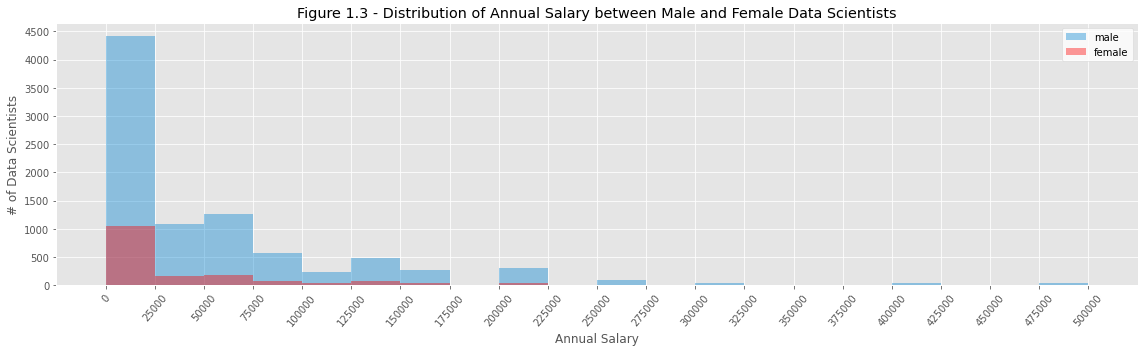

In [39]:
# Figure 1.3 - histogram of salary by gender
fig, ax = plt.subplots(figsize=(16,5))
ax.hist(male_df['annual_salary'], bins=np.arange(0,500001,25000), color='#0485d1', 
        alpha=0.4, label='male')
ax.hist(female_df['annual_salary'], bins=np.arange(0,500001,25000), color='red', 
        alpha=0.4, label='female')
# formatting
ax.legend(facecolor='white', loc=1)
ax.set_xticks(np.arange(0,500001,25000))
ax.set_yticks(np.arange(0,4501,500))
ax.set_xlabel('Annual Salary')
ax.set_xticklabels(np.arange(0,500001,25000), rotation=50)
ax.set_ylabel('# of Data Scientists')
ax.set_title('Figure 1.3 - Distribution of Annual Salary between Male and Female\
 Data Scientists')
plt.tight_layout()
#fig.savefig('gender_salary.png', dpi=550)
plt.show()

## **Question 2 - Estimate Difference Between Average Salary of Men and Women**

[4pts] Estimating the difference between average salary (Q24) of men vs. women (Q2).



### **2.1 Compute Descriptive Statistics**

a. **[0.5pts]** Compute and report descriptive statistics for each group (remove missing data, if
necessary).



In [12]:
# check for NaN/null values.  None exist:
male_df.info()      # 8872 non-null rows/8872 data points 
print("\n")
female_df.info()    # 1683 non-null rows/1683 data points

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8872 entries, 0 to 10728
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age_grp        8872 non-null   object
 1   gender         8872 non-null   object
 2   country        8872 non-null   object
 3   degree         8872 non-null   object
 4   title          8872 non-null   object
 5   yrs_exp        8872 non-null   object
 6   annual_salary  8872 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 554.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683 entries, 7 to 10718
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age_grp        1683 non-null   object
 1   gender         1683 non-null   object
 2   country        1683 non-null   object
 3   degree         1683 non-null   object
 4   title          1683 non-null   object
 5   yrs_exp        1683 non-null   object
 

In [13]:
# combine columns from .describe() method for male_df and female_df
descriptive_data = pd.DataFrame([male_df['annual_salary'].describe().values, 
          female_df['annual_salary'].describe().values], 
          columns=male_df['annual_salary'].describe().index, 
          index=['male','female']).T
descriptive_data

,male,female
count,8872.000000,1683.000000
mean,50750.619928,36417.112299
std,70347.974812,59442.716093
min,1000.000000,1000.000000
25%,3000.000000,1000.000000
50%,25000.000000,7500.000000
75%,70000.000000,50000.000000
max,500000.000000,500000.000000


### **2.2 Perform Two-Sample T-Test**

b. **[0.5pts]** If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.

In [14]:
from scipy import stats
from sklearn.utils import resample

# Assumptions for t-test: 1. independent samples, 2. normality, 3. equal vars.
# 1. no relation between male and female data points
# 2. means are normally distributed based on Central Limit Theorem (CLT)
# 3. we assume equal variances as per instructions from TA
# therefore, we can perform two sample t-test
t1, p1 = stats.ttest_ind(male_df['annual_salary'], female_df['annual_salary'])

print("Null Hypothesis: mean_male_sample = mean_female_sample")
print("Alt. Hypothesis: mean_male_sample != mean_female_sample\n")
print("Threshold (alpha) = 0.05")
print("t-value: ", t1)
print("p-value: ", p1, "\n")
print("Conclusion: Reject null hypothesis since p-value << alpha.  \
\nTherefore, difference in mean is statistically significant.")

Null Hypothesis: mean_male_sample = mean_female_sample
Alt. Hypothesis: mean_male_sample != mean_female_sample

Threshold (alpha) = 0.05
t-value:  7.844333791744695
p-value:  4.77315104074462e-15 

Conclusion: Reject null hypothesis since p-value << alpha.  
Therefore, difference in mean is statistically significant.


### **2.3 Bootstrap Data for Comparing the Two Groups**

c. **[1.5pts]** Bootstrap your data for comparing the mean of salary (Q24) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.


In [15]:
def bootstrap(series_col, iterations: int):
    '''
    conduct bootstrap process and return an array of sample means that can be
    plotted in a histogram
    ARGS:
    series_col (pandas series)  - 1D array of sample data points
    iterations (int)            - number of iterations to repeat sampling

    RETURN:
    mean_list (numpy array)     - 1D array of each iteration sample mean
    '''
    mean_list = []

    for i in range(iterations):
        m = np.mean(resample(series_col))   # with replacement
        mean_list.append(m)
    
    return np.array(mean_list)

In [16]:
# import random module and set random.seed() for replicability
import random
random.seed(1)

# run bootstrap on each male_df and female_df sample and store in variables
mens_mean_salary = bootstrap(male_df['annual_salary'], 1000)
womens_mean_salary = bootstrap(female_df['annual_salary'], 1000)

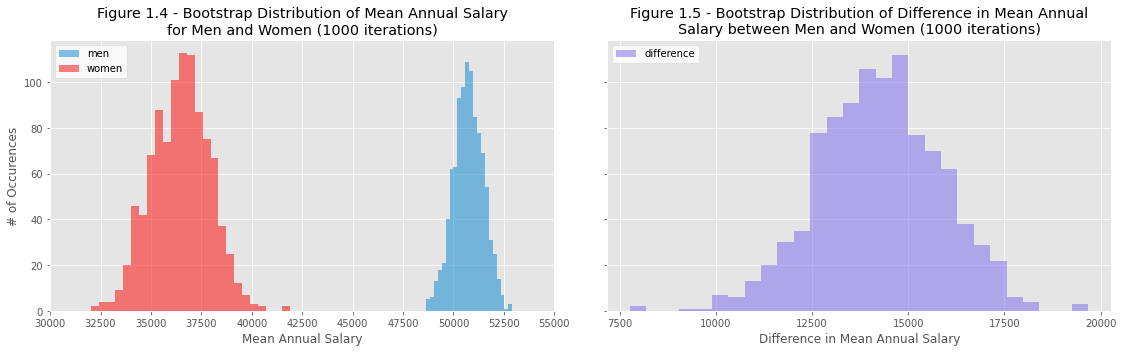

In [42]:
# Figure 1.4 - plot bootstrap means for male and female
fig, ax = plt.subplots(1,2, figsize=(16,5), sharey=True)
ax[0].hist(mens_mean_salary, bins='auto', color='#0485d1', alpha=0.5, label='men')
ax[0].hist(womens_mean_salary, bins='auto', color='r', alpha=0.5, label='women')
#formatting
ax[0].set_xticks(np.arange(30000, 55001, 2500))
ax[0].set_ylabel('# of Occurences')
ax[0].set_xlabel('Mean Annual Salary')
ax[0].set_title('Figure 1.4 - Bootstrap Distribution of Mean Annual Salary\
\nfor Men and Women (1000 iterations)')
ax[0].legend(facecolor='white', loc=2)

# Figure 1.5 - plot difference in bootstrap means between male and female
ax[1].hist(mens_mean_salary-womens_mean_salary, bins='auto', 
           color='mediumslateblue', alpha=0.5, label='difference')
# formatting
ax[1].set_xticks(np.arange(7500, 20001, 2500))
ax[1].set_xlabel('Difference in Mean Annual Salary')
ax[1].set_title('Figure 1.5 - Bootstrap Distribution of Difference in Mean Annual\
\nSalary between Men and Women (1000 iterations)')
ax[1].legend(facecolor='white', loc=2)
plt.tight_layout()
#fig.savefig('bootstrap_gender.png', dpi=550)
plt.show()

### **2.4 Perform Two-Sample T-Test on Bootstrapped Data**

d. **[0.5pts]** If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped
data. Explain your rationale.

In [18]:
# Assumptions for t-test: 1. independent samples, 2. normality, 3. equal vars.
# 1. no relation between male and female data points
# 2. means are normally distributed by definition of bootstrap
# 3. we assume equal variances as per instructions from TA
# therefore, we can perform two sample t-test
t2, p2 = stats.ttest_ind(mens_mean_salary, womens_mean_salary)

print("Null Hypothesis: bootstrap_male_mean = bootstrap_female_mean")
print("Alt. Hypothesis: bootstrap_male_mean != bootstrap_female_mean\n")
print("Threshold (alpha) = 0.05")
print("t-value: ", t2)
print("p-value: ", p2, "\n")
print("Conclusion: Reject null hypothesis since p-value << alpha.  \
\nTherefore, difference in bootstrap means is statistically significant.")

Null Hypothesis: bootstrap_male_mean = bootstrap_female_mean
Alt. Hypothesis: bootstrap_male_mean != bootstrap_female_mean

Threshold (alpha) = 0.05
t-value:  278.72503616516894
p-value:  0.0 

Conclusion: Reject null hypothesis since p-value << alpha.  
Therefore, difference in bootstrap means is statistically significant.


## **Question 3 - Estimate Difference in Salary vs. Highest Level of Education**

**[4pts]** Estimating the difference between average salary (Q24) of three groups (Bachelor's degree, Doctoral degree, Master's degree).


### **3.1 - Compute Descriptive Statistics for Each Group**

a. **[0.5pts]** Compute and report descriptive statistics for each group (remove missing data, if necessary).


In [19]:
# split data into each degree group: bachelor, master and doctorate
bachelor_df = eda_df[eda_df['degree']=="Bachelor’s degree"]
masters_df = eda_df[eda_df['degree']=="Master’s degree"]
doctoral_df = eda_df[eda_df['degree']=="Doctoral degree"]

print("bachelor_df shape: ", bachelor_df.shape)
print("masters_df shape: ", masters_df.shape)
print("doctoral_df shape: ", doctoral_df.shape)

bachelor_df shape:  (3013, 7)
masters_df shape:  (4879, 7)
doctoral_df shape:  (1718, 7)


In [20]:
# check for NaN/null values.  No NaN or null values found
bachelor_df.info()  # 3013 non-null rows/3013 data points
print("\n")
masters_df.info()   # 4879 non-null rows/4879 data points
print("\n")
doctoral_df.info()  # 1718 non-null rows/1718 data points

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 1 to 10727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age_grp        3013 non-null   object
 1   gender         3013 non-null   object
 2   country        3013 non-null   object
 3   degree         3013 non-null   object
 4   title          3013 non-null   object
 5   yrs_exp        3013 non-null   object
 6   annual_salary  3013 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 188.3+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4879 entries, 0 to 10728
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age_grp        4879 non-null   object
 1   gender         4879 non-null   object
 2   country        4879 non-null   object
 3   degree         4879 non-null   object
 4   title          4879 non-null   object
 5   yrs_exp        4879 non-null   object
 

In [21]:
# consolidate bachelor, master and doctoral .describe() data
descriptive_data = pd.DataFrame([bachelor_df['annual_salary'].describe().values, 
          masters_df['annual_salary'].describe().values, 
          doctoral_df['annual_salary'].describe().values], 
          columns=bachelor_df['annual_salary'].describe().index, 
          index=['bachelors','masters','doctorate']).T
descriptive_data

,bachelors,masters,doctorate
count,3013.000000,4879.000000,1718.000000
mean,35732.824427,52120.106579,68719.441211
std,60247.753546,67681.571528,85403.650394
min,1000.000000,1000.000000,1000.000000
25%,1000.000000,4000.000000,5000.000000
50%,10000.000000,25000.000000,40000.000000
75%,50000.000000,70000.000000,90000.000000
max,500000.000000,500000.000000,500000.000000


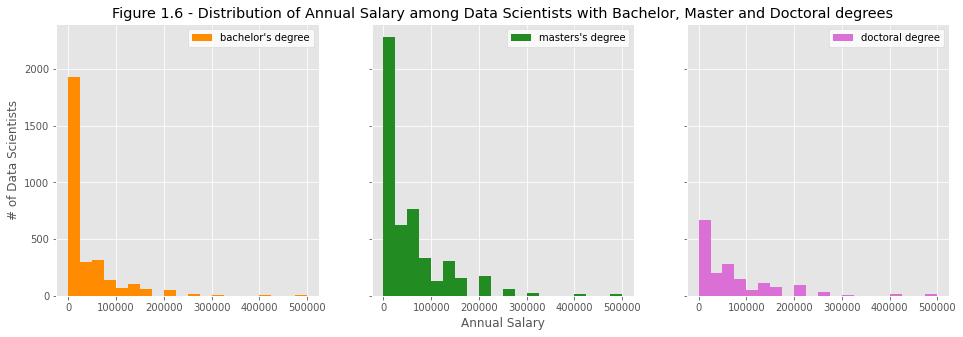

In [41]:
# Figure 1-6 - Histograms of annual salary for each degree type  
fig, ax = plt.subplots(1,3, figsize=(16,5), sharey=True)

ax[0].hist(bachelor_df['annual_salary'], bins=np.arange(0,500001,25000), 
           color='darkorange', label='bachelor\'s degree')
ax[1].hist(masters_df['annual_salary'], bins=np.arange(0,500001,25000), 
           color='forestgreen', label='masters\'s degree')
ax[2].hist(doctoral_df['annual_salary'], bins=np.arange(0,500001,25000), 
           color='orchid', label='doctoral degree')
# formatting
for i in range(3):
    ax[i].legend(facecolor='white', loc=1)
ax[1].set_xlabel('Annual Salary')
ax[0].set_ylabel('# of Data Scientists')
ax[1].set_title('Figure 1.6 - Distribution of Annual Salary among Data Scientists with Bachelor, Master and Doctoral degrees')
#fig.savefig('degree_salary.png', dpi=550)
plt.show()

### **3.2 - Perform ANOVA (if applicable)**

b. **[0.5pts]** If suitable, perform an ANOVA to compare mean of three groups(Bachelor's degree, Doctoral degree, Master's degree). Explain your rationale.

In [34]:
from scipy.stats import f_oneway

# Assumptions for ANOVA: 1. independent samples, 2. normality, 3. equal vars.
# 1. no relation between degree type data points
# 2. means are normally distributed as per CLT
# 3. we assume equal variances as per instructions from TA
# therefore, we can perform ANOVA
F3, p3 = f_oneway(bachelor_df.annual_salary,masters_df.annual_salary,
                  doctoral_df.annual_salary)

print("Null Hypothesis: bachelor_df_mean = masters_df_mean = doctoral_df_mean")
print("Alt. Hypothesis: atleast 1 of bachelor_df_mean, masters_df_mean or \
doctoral_df_mean \nis different\n")
print("Threshold (alpha) = 0.05")
print("F-value: ", F3)
print("p-value: ", p3, "\n")
print("Conclusion: Reject null hypothesis since p-value << alpha.  \
\nTherefore, atleast 1 of the three means is statistically significant.")

Null Hypothesis: bachelor_df_mean = masters_df_mean = doctoral_df_mean
Alt. Hypothesis: atleast 1 of bachelor_df_mean, masters_df_mean or doctoral_df_mean 
is different

Threshold (alpha) = 0.05
F-value:  129.7560112960932
p-value:  2.4852074227874282e-56 

Conclusion: Reject null hypothesis since p-value << alpha.  
Therefore, atleast 1 of the three means is statistically significant.


### **3.3 - Bootstrap Data and Compare Mean of Salary between Groups**

c. **[1.5pts]** Bootstrap your data for comparing the mean of salary (Q24) for the three groups.  Note that the number of instances you sample from each group should be relative to its
size. Use 1000 replications. Plot bootstrapped distributions (for each degree) and the distribution of the difference in means.

In [24]:
# run bootsrap function for each of the three degree data sets and store in var
bachelor_mean_salary = bootstrap(bachelor_df['annual_salary'], 1000)
masters_mean_salary = bootstrap(masters_df['annual_salary'], 1000)
doctoral_mean_salary = bootstrap(doctoral_df['annual_salary'], 1000)

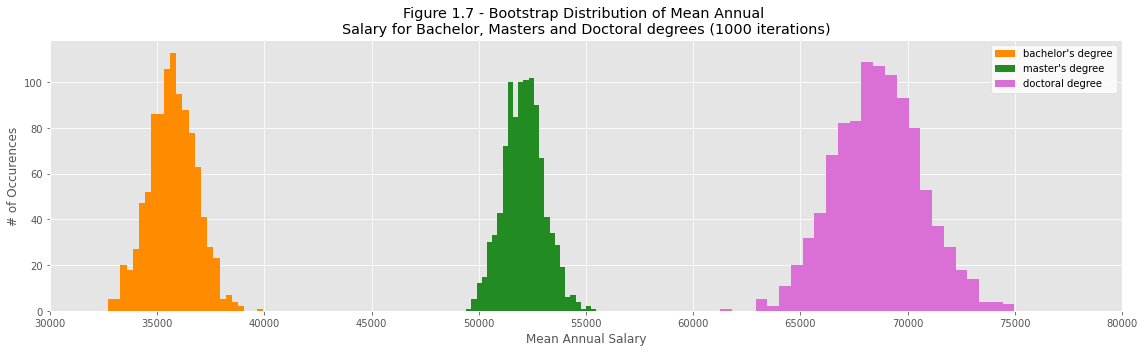

In [43]:
# Figure 1.7 - Bootsrap distributions of annual salary for each degree type
fig, ax = plt.subplots(figsize=(16,5))
ax.hist(bachelor_mean_salary, bins='auto', color='darkorange', 
        label='bachelor\'s degree')
ax.hist(masters_mean_salary, bins='auto', color='forestgreen', 
        label='master\'s degree')
ax.hist(doctoral_mean_salary, bins='auto', color='orchid', 
        label='doctoral degree')
# formatting
ax.set_xticks(np.arange(30000, 80001, 5000))
ax.set_ylabel('# of Occurences')
ax.set_xlabel('Mean Annual Salary')
ax.set_title('Figure 1.7 - Bootstrap Distribution of Mean Annual \n\
Salary for Bachelor, Masters and Doctoral degrees (1000 iterations)')
ax.legend(facecolor='white', loc=1)
plt.tight_layout()
#fig.savefig('bootstrap_degree.png', dpi=550)
plt.show()

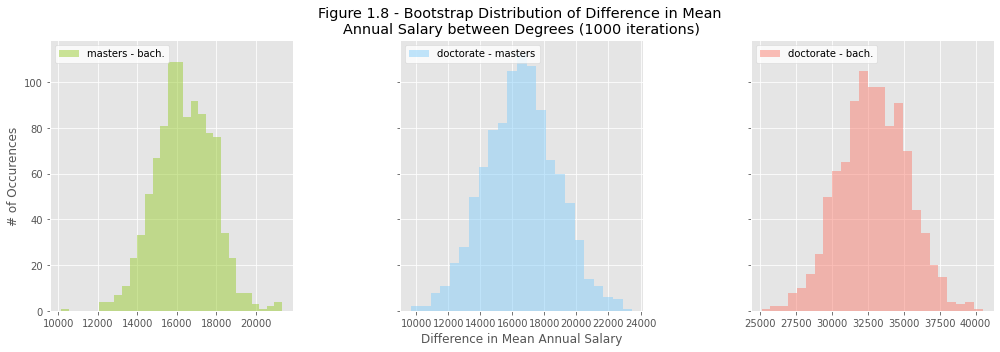

In [26]:
# Figure 1.8 - Bootstrap distribution of difference between three degree groups
fig, ax = plt.subplots(1,3, figsize=(14,5), sharey=True)
ax[0].hist(masters_mean_salary-bachelor_mean_salary, bins='auto', 
           color='yellowgreen', alpha=0.5, label='masters - bach.')
ax[1].hist(doctoral_mean_salary-masters_mean_salary, bins='auto', 
           color='lightskyblue', alpha=0.5, label='doctorate - masters')
ax[2].hist(doctoral_mean_salary-bachelor_mean_salary, bins='auto', 
           color='salmon', alpha=0.5, label='doctorate - bach.')
# formatting
ax[0].set_ylabel('# of Occurences')
ax[1].set_xlabel('Difference in Mean Annual Salary')
ax[1].set_title('Figure 1.8 - Bootstrap Distribution of Difference in Mean \n\
Annual Salary between Degrees (1000 iterations)')
for i in range(3):
    ax[i].legend(facecolor='white', loc=2)
plt.tight_layout()
#fig.savefig('bootstrap_degree_differences.png', dpi=600)
plt.show()

### **3.4 - Perform ANOVA on Boostrapped Data (if applicable)**

d. **[0.5pts]** If suitable, perform a ANOVA with a 0.05 threshold on the bootstrapped data to compare means of salary for three groups(Bachelor's degree, Doctoral degree and Master's degree). Explain your rationale.

In [30]:
from scipy.stats import f_oneway

# Assumptions for ANOVA: 1. independent samples, 2. normality, 3. equal vars.
# 1. no relation between degree type data points
# 2. means are normally distributed as per definition of bootstrap
# 3. we assume equal variances as per instructions from TA
# therefore, we can perform ANOVA
F4, p4 = f_oneway(bachelor_mean_salary, masters_mean_salary, doctoral_mean_salary)

print("Null Hypothesis: bootstrap_bach_mean = bootstrap_masters_mean = \
bootstrap_doctoral_mean")
print("Alt. Hypothesis: atleast 1 of bootstrap_bachelor_mean, \
bootstrap_masters_mean or \nbootstrap_doctoral_mean is different\n")
print("Threshold (alpha) = 0.05")
print("F-value: ", F4)
print("p-value: ", p4, "\n")
print("Conclusion: Reject null hypothesis since p-value << alpha.  \
\nTherefore, atleast 1 of the three means is statistically significant.")

Null Hypothesis: bootstrap_bach_mean = bootstrap_masters_mean = bootstrap_doctoral_mean
Alt. Hypothesis: atleast 1 of bootstrap_bachelor_mean, bootstrap_masters_mean or 
bootstrap_doctoral_mean is different

Threshold (alpha) = 0.05
F-value:  130122.03537245217
p-value:  0.0 

Conclusion: Reject null hypothesis since p-value << alpha.  
Therefore, atleast 1 of the three means is statistically significant.
